In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

In [2]:
#Volviendo a tomar una recta de la forma y = mx + b
m_i = 1.3
b_i =  3.1
N = 1000

In [3]:
data = 10*np.random.rand(N)

In [4]:
y = m_i*data+b_i
yerr = 0.1+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)

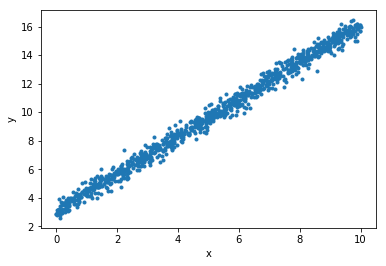

In [22]:
plt.plot(data, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
def lnlike(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2)
    return -0.5*(np.sum((y-model)**2 - np.log(inv_sigma2)))

In [7]:
plist = [0.0,5.0,0.0,5.0]

In [8]:
def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf

In [9]:
sigma_m = 0.1
sigma_b = 0.3

In [10]:
m_new = np.random.uniform(m_i,sigma_m,1000)
#plt.plot(m_new)

In [11]:
b_new = np.random.uniform(b_i,sigma_b,1000)
#plt.plot(b_new)
#plt.show()

In [12]:
def Pasos(theta_i,theta_p):
    if (lnprior(theta_p,theta_p)):
        return theta_i    
    p_i=lnlike(theta_i)
    p_p=lnlike(theta_p)
    p_n=p_p/p_i
    p_n=min(1.,p_n)
    if (p_n==1.):
        return theta_p
    else:
        x=random()
        if (p_n>=x):
            return theta_p
        else:
            return theta_i
    return

In [13]:
NS = 1000
Nc = 10
theta_in = [1.3,3.1]
c = []

In [14]:
for i in range(N):
    theta_i = np.array([np.random.normal(theta_in[0],sigma_m),np.random.normal(theta_in[1], sigma_b)],)
    for l in range(NS):
        if l==0:
            cadena = theta_i
        else:
            theta_p = np.array([np.random.normal(theta_in[0], sigma_m),np.random.normal(theta_in[1], sigma_b)])
            theta_n = Pasos(theta_i,theta_p)
            cadena = np.concatenate((cadena,theta_n))
            theta_i = theta_n
    if i==0:
        c = cadena
    else:
        c = np.vstack((c,cadena))

In [21]:
chain = c[:,:].reshape((-1, 2))

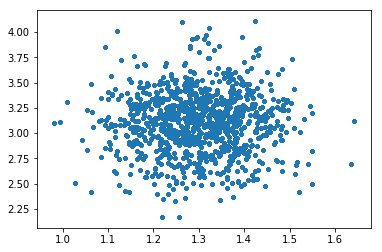

In [16]:
plt.scatter(chain[:,0],chain[:,1],s=None, marker='.')
plt.show()

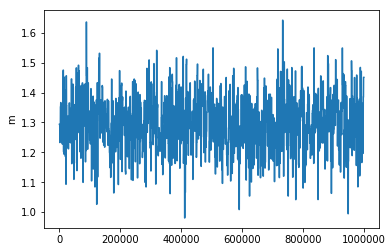

In [17]:
plt.plot(chain[:,0])
plt.ylabel('m')
plt.show()

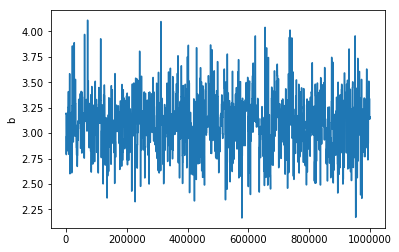

In [18]:
plt.plot(chain[:,1])
plt.ylabel('b')
plt.show()

(array([  6000.,  26000.,  91000., 184000., 253000., 227000., 147000.,
         52000.,  12000.,   2000.]),
 array([0.98048538, 1.04666435, 1.11284332, 1.17902229, 1.24520126,
        1.31138023, 1.3775592 , 1.44373817, 1.50991714, 1.57609611,
        1.64227508]),
 <a list of 10 Patch objects>)

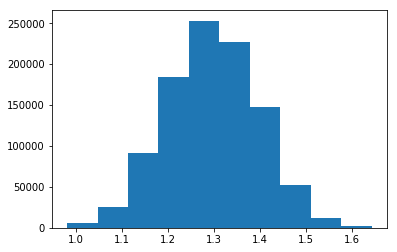

In [19]:
plt.hist(chain[:,0])

(array([  6000.,  33000.,  87000., 160000., 250000., 255000., 141000.,
         42000.,  16000.,  10000.]),
 array([2.16673913, 2.36103738, 2.55533562, 2.74963387, 2.94393212,
        3.13823036, 3.33252861, 3.52682686, 3.7211251 , 3.91542335,
        4.10972159]),
 <a list of 10 Patch objects>)

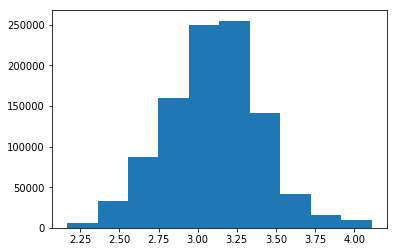

In [20]:
plt.hist(chain[:,1])